## Etude des médecins

In [50]:
# %load exo_dom_lesson5_2.py
#!/usr/bin/env python3
"""
Created on Wed Nov 28 19:17:14 2018

Peut-on établir un lien entre la densité de médecins par spécialité  et par territoire 
et la pratique du dépassement d'honoraires ? Est-ce  dans les territoires où la densité 
est la plus forte que les médecins  pratiquent le moins les dépassement d'honoraires ? 
Est ce que la densité de certains médecins / praticiens est corrélé à la densité de
population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...) ?

@author: margaux
"""

import pandas as pd

# Importation des données et mise en forme dans un DataFrame
filename = 'Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls'
sheets = ['Spécialistes', 'Généralistes et MEP', 'Dentistes et ODF', 'Sages-femmes', 'Auxiliaires médicaux']
file = pd.read_excel(filename, sheet_name = sheets, header = 0, skiprows = 0,
                     na_values = 'nc')
df = pd.DataFrame()
for elt in file:
    file[elt] = file[elt].rename(columns = {file[elt].columns[0] : 'Spécialité'})
    df = df.append(file[elt], ignore_index=True)
    
# Suppression des lignes de totaux
df = df.loc[~(df['Spécialité'].str.contains('TOTAL'))]
df = df.loc[~(df['DEPARTEMENT'].str.contains('TOTAL'))]



In [3]:
df.head()

,Spécialité,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.0,7026259.78
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4985259.62,373837.57,0.0,5359097.19
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5102901.70,560978.59,0.0,5663880.29
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,NaN,NaN,NaN,NaN
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,5,NaN,NaN,NaN,NaN


### Existe-t-il un lien entre la densité de médecins par spécialité  et par territoire et la pratique du dépassement d'honoraires ?

In [4]:
import matplotlib.pyplot as plt

In [41]:
df_byspec = df.groupby('Spécialité').mean()

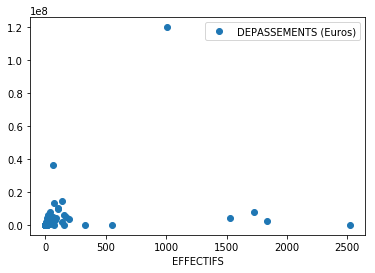

In [42]:
df_byspec.plot(x = 'EFFECTIFS', y = 'DEPASSEMENTS (Euros)', style = 'o')

On a un point aberrant, on va l'enlever pour avoir une meilleure vision

In [44]:
df_bbyspec.sort_values(by = ['DEPASSEMENTS (Euros)'], ascending = False)

,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
Spécialité,,,,,
19- Chirurgiens-dentistes,104490,1.300192e+10,1.246093e+10,5.532576e+04,2.546291e+10
"36- Chirurgiens-dentistes, spécialistes O.D.F.",6336,1.132368e+09,2.151887e+09,0.000000e+00,3.284255e+09
15- Ophtalmologie,14076,3.824073e+09,1.321061e+09,3.766210e+03,5.145139e+09
41- Chirurgie orthopédique et traumatologie,7362,1.697646e+09,9.220432e+08,3.340380e+03,2.619692e+09
01- OMNIPRATICIENS,179256,2.674880e+10,8.266784e+08,1.173683e+08,2.769285e+10
02- Anesthésie-réanimation chirurgicale,10839,2.975837e+09,7.987273e+08,2.745000e+01,3.774565e+09
07- Gynécologie obstétrique,10584,1.680745e+09,7.645232e+08,2.417740e+03,2.445271e+09
06- Radiodiagnostic et imagerie médicale,16182,7.667634e+09,5.594835e+08,3.091197e+04,8.227149e+09
01- Médecine générale,158886,2.404329e+10,4.618839e+08,1.089001e+08,2.461407e+10


Les chirugiens dentistes sont hors norme. On les retire pour le graph suivant

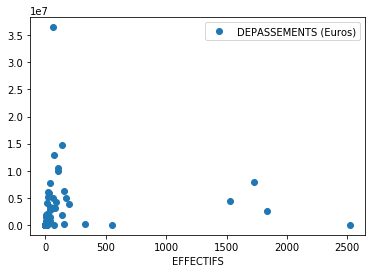

In [45]:
df_byspec = df_byspec.drop(['19- Chirurgiens-dentistes'])
df_byspec.plot(x = 'EFFECTIFS', y = 'DEPASSEMENTS (Euros)', style = 'o')

A priori pas de lien direct entre effectif et dépassement d'honoraires, par spécialité.

In [52]:
df_bydept = df.groupby('DEPARTEMENT').mean()

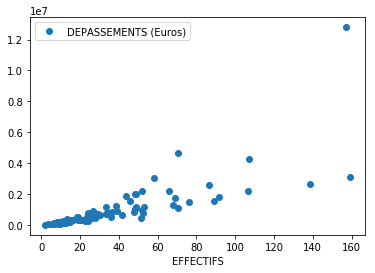

In [53]:
df_bydept.plot(x = 'EFFECTIFS', y = 'DEPASSEMENTS (Euros)', style = 'o')

In [59]:
df_bydept.sort_values(by = ['DEPASSEMENTS (Euros)'], ascending = False)
df_bydept = df_bydept.drop(['75- Paris (Ville)'])

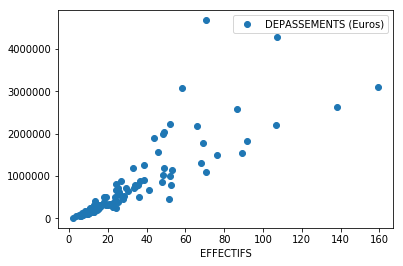

In [60]:
df_bydept.plot(x = 'EFFECTIFS', y = 'DEPASSEMENTS (Euros)', style = 'o')

Clairement un lien positif entre effectif de médecins et la pratique du dépassement (une fois Paris retiré)

### On regarde le ratio dépassement / effectif par département

In [62]:
df['Dépassement/Medecin'] = df['DEPASSEMENTS (Euros)'] / df['EFFECTIFS']

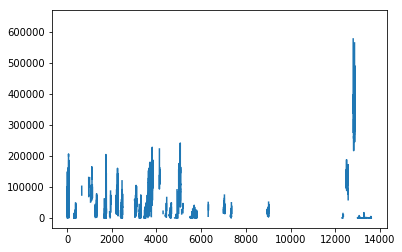

In [63]:
df['Dépassement/Medecin'].plot()